In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets

In [2]:
import sklearn.decomposition as de
de.__all__

['DictionaryLearning',
 'FastICA',
 'IncrementalPCA',
 'KernelPCA',
 'MiniBatchDictionaryLearning',
 'MiniBatchNMF',
 'MiniBatchSparsePCA',
 'NMF',
 'PCA',
 'SparseCoder',
 'SparsePCA',
 'dict_learning',
 'dict_learning_online',
 'fastica',
 'non_negative_factorization',
 'randomized_svd',
 'sparse_encode',
 'FactorAnalysis',
 'TruncatedSVD',
 'LatentDirichletAllocation']

In [3]:
boston = sklearn.datasets.load_boston()
boston_pd = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_pd

C:\conda\venv\torch\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
model = de.DictionaryLearning(n_components=2, n_jobs=-1, max_iter=100)
boston_dl = model.fit_transform(boston_pd)
boston_dl

array([[488.25476363,   0.        ],
       [449.41864333,   0.        ],
       [444.47269392,   0.        ],
       ...,
       [474.24759017,   0.        ],
       [471.82085782,   0.        ],
       [473.02920243,   0.        ]])

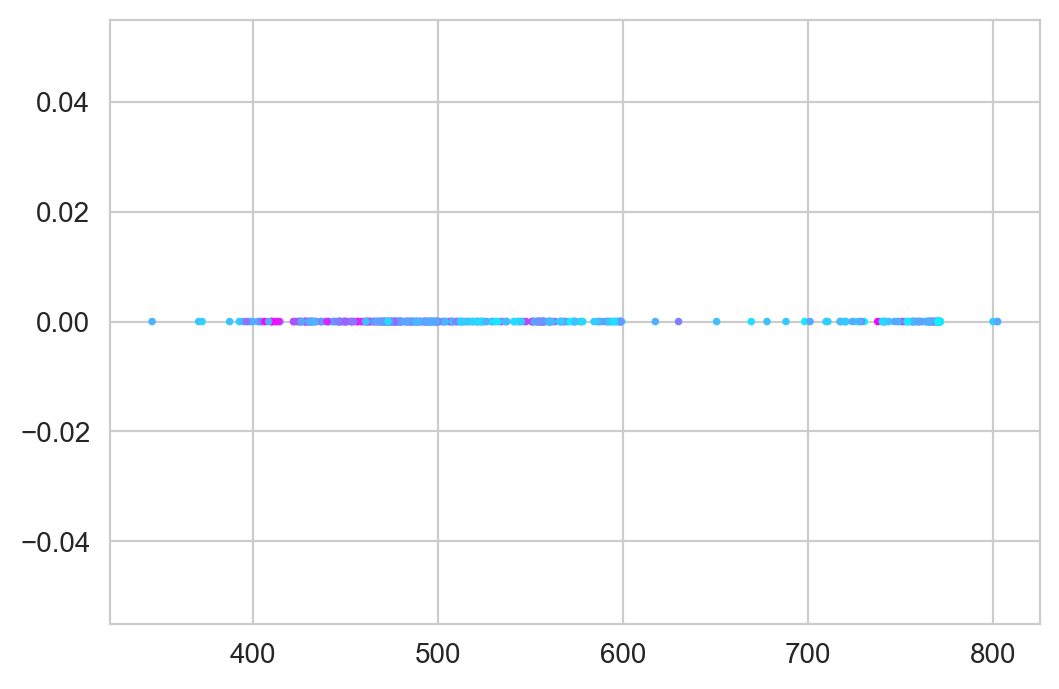

In [11]:
plt.figure(dpi=200)
plt.scatter(boston_dl[:, 0], boston_dl[:, 1], c=boston.target, cmap='cool', s=3)
plt.show()

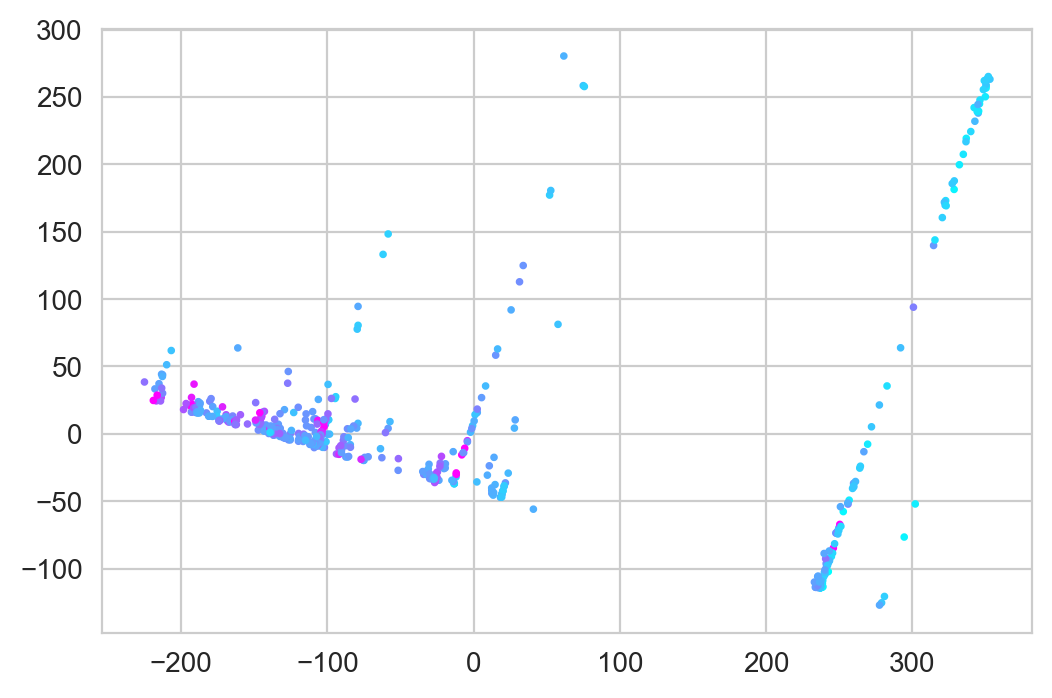

In [12]:
model = de.PCA(n_components=2)
boston_dl = model.fit_transform(boston_pd)
plt.figure(dpi=200)
plt.scatter(boston_dl[:, 0], boston_dl[:, 1], c=boston.target, cmap='cool', s=3)
plt.show()

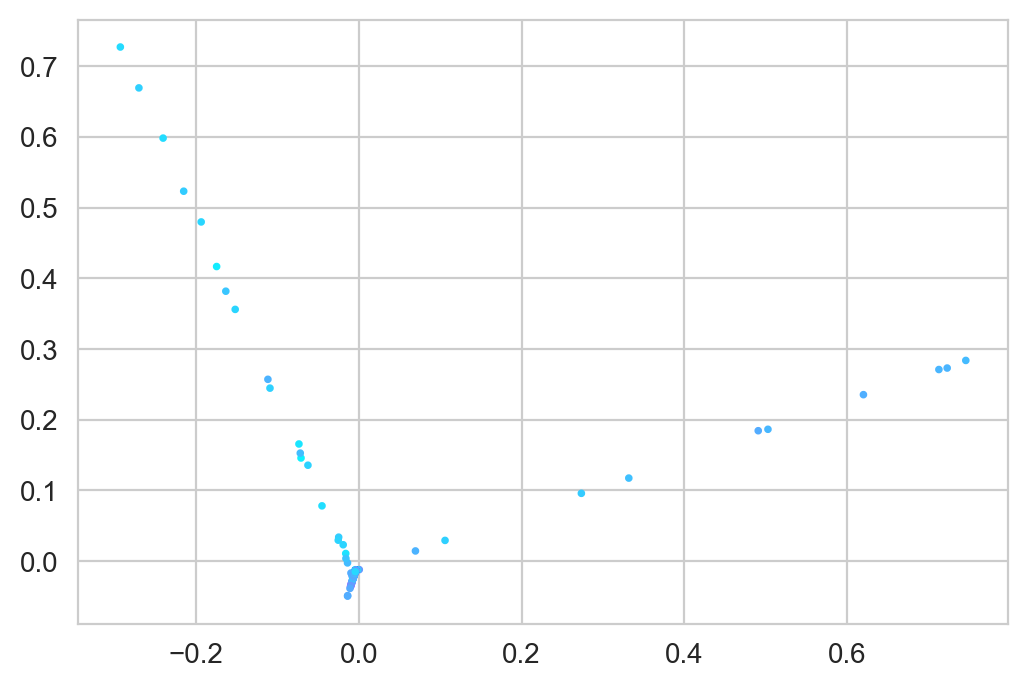

In [19]:
model = de.KernelPCA(n_components=2, kernel='rbf',fit_inverse_transform=True)
boston_dl = model.fit_transform(boston_pd)
plt.figure(dpi=200)
plt.scatter(boston_dl[:, 0], boston_dl[:, 1], c=boston.target, cmap='cool', s=3)
plt.show()

In [15]:
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
boston_pca_after = model.inverse_transform(boston_dl)
boston_pca_after_pd = pd.DataFrame(boston_pca_after, columns=boston.feature_names)
boston_pca_after_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.066075,16.579979,7.769719,0.076401,0.500800,6.422568,58.585840,4.579284,4.204835,296.066062,17.798595,396.883914,9.871949
1,-1.267046,18.737418,6.301889,0.077519,0.478760,6.485625,54.392124,4.906816,1.861254,244.877177,17.484145,396.185050,8.836495
2,-1.252960,18.760454,6.270324,0.077135,0.478578,6.487567,54.334182,4.910984,1.808115,243.317619,17.471759,392.517204,8.849686
3,-1.837675,19.677269,5.656773,0.077865,0.469178,6.513548,52.560497,5.049740,0.830263,222.215526,17.343933,394.572257,8.394084
4,-1.849529,19.670441,5.670439,0.078086,0.469217,6.512628,52.581241,5.048322,0.853637,222.952447,17.350053,396.651868,8.383600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.411401,17.416249,7.178719,0.076286,0.492330,6.448770,56.942013,4.707173,3.257426,274.819475,17.664188,391.537294,9.504207
502,-0.466652,17.445829,7.179342,0.076818,0.491959,6.447978,56.901698,4.710787,3.261999,275.440121,17.671664,396.306464,9.458355
503,-0.434594,17.397008,7.211497,0.076766,0.492461,6.446636,56.995720,4.703420,3.313156,276.530864,17.678177,396.077950,9.483405
504,-0.386657,17.362458,7.220083,0.076377,0.492864,6.446817,57.050521,4.698805,3.324290,276.399570,17.674736,392.652571,9.522752


In [20]:
boston_pca_after = model.inverse_transform(boston_dl)
boston_pca_after_pd = pd.DataFrame(boston_pca_after, columns=boston.feature_names)
boston_pca_after_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.559281,11.662153,10.896100,0.071116,0.551251,6.285810,67.717543,3.845439,9.364873,403.338631,18.382964,355.406788,12.479498
1,3.559281,11.662153,10.896100,0.071116,0.551251,6.285810,67.717543,3.845439,9.364873,403.338631,18.382964,355.406788,12.479498
2,3.558881,11.663600,10.894597,0.071126,0.551223,6.285721,67.711778,3.845651,9.363657,403.304344,18.382269,355.394493,12.478308
3,3.558700,11.664235,10.893942,0.071130,0.551211,6.285682,67.709253,3.845745,9.363110,403.289160,18.381966,355.389116,12.477783
4,3.553938,11.681497,10.875998,0.071253,0.550880,6.284615,67.640420,3.848275,9.348637,402.880200,18.373668,355.242216,12.463580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.559172,11.662548,10.895689,0.071118,0.551243,6.285786,67.715967,3.845497,9.364541,403.329265,18.382774,355.403426,12.479173
502,3.548988,11.699397,10.857376,0.071379,0.550536,6.283504,67.568957,3.850896,9.333600,402.455455,18.365046,355.089552,12.448831
503,3.546170,11.709541,10.846822,0.071451,0.550340,6.282873,67.528429,3.852382,9.325046,402.214252,18.360155,355.002916,12.440461
504,3.546020,11.710086,10.846254,0.071455,0.550330,6.282839,67.526248,3.852462,9.324589,402.201310,18.359891,354.998251,12.440011


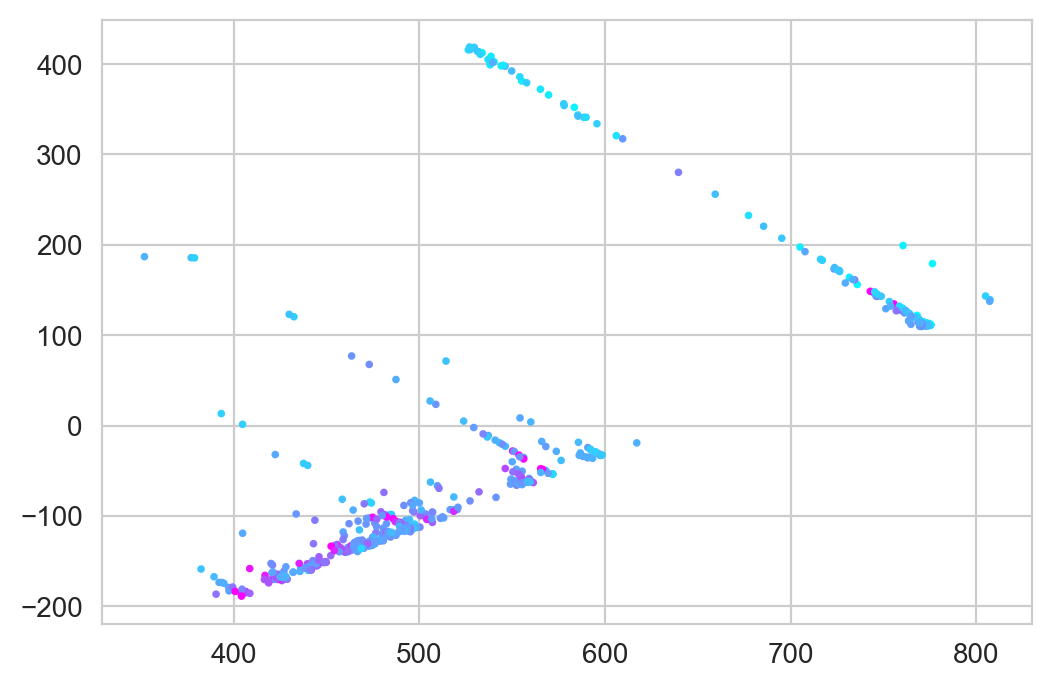

In [21]:
model = de.TruncatedSVD(n_components=2)
boston_dl = model.fit_transform(boston_pd)
plt.figure(dpi=200)
plt.scatter(boston_dl[:, 0], boston_dl[:, 1], c=boston.target, cmap='cool', s=3)
plt.show()

In [22]:
boston_svd_after = model.inverse_transform(boston_dl)
boston_svd_after_pd = pd.DataFrame(boston_pca_after, columns=boston.feature_names)
boston_svd_after_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.559281,11.662153,10.896100,0.071116,0.551251,6.285810,67.717543,3.845439,9.364873,403.338631,18.382964,355.406788,12.479498
1,3.559281,11.662153,10.896100,0.071116,0.551251,6.285810,67.717543,3.845439,9.364873,403.338631,18.382964,355.406788,12.479498
2,3.558881,11.663600,10.894597,0.071126,0.551223,6.285721,67.711778,3.845651,9.363657,403.304344,18.382269,355.394493,12.478308
3,3.558700,11.664235,10.893942,0.071130,0.551211,6.285682,67.709253,3.845745,9.363110,403.289160,18.381966,355.389116,12.477783
4,3.553938,11.681497,10.875998,0.071253,0.550880,6.284615,67.640420,3.848275,9.348637,402.880200,18.373668,355.242216,12.463580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.559172,11.662548,10.895689,0.071118,0.551243,6.285786,67.715967,3.845497,9.364541,403.329265,18.382774,355.403426,12.479173
502,3.548988,11.699397,10.857376,0.071379,0.550536,6.283504,67.568957,3.850896,9.333600,402.455455,18.365046,355.089552,12.448831
503,3.546170,11.709541,10.846822,0.071451,0.550340,6.282873,67.528429,3.852382,9.325046,402.214252,18.360155,355.002916,12.440461
504,3.546020,11.710086,10.846254,0.071455,0.550330,6.282839,67.526248,3.852462,9.324589,402.201310,18.359891,354.998251,12.440011
